In [55]:
import pandas as pd
df = pd.read_csv("Company_Data.csv")
df.shape
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [57]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


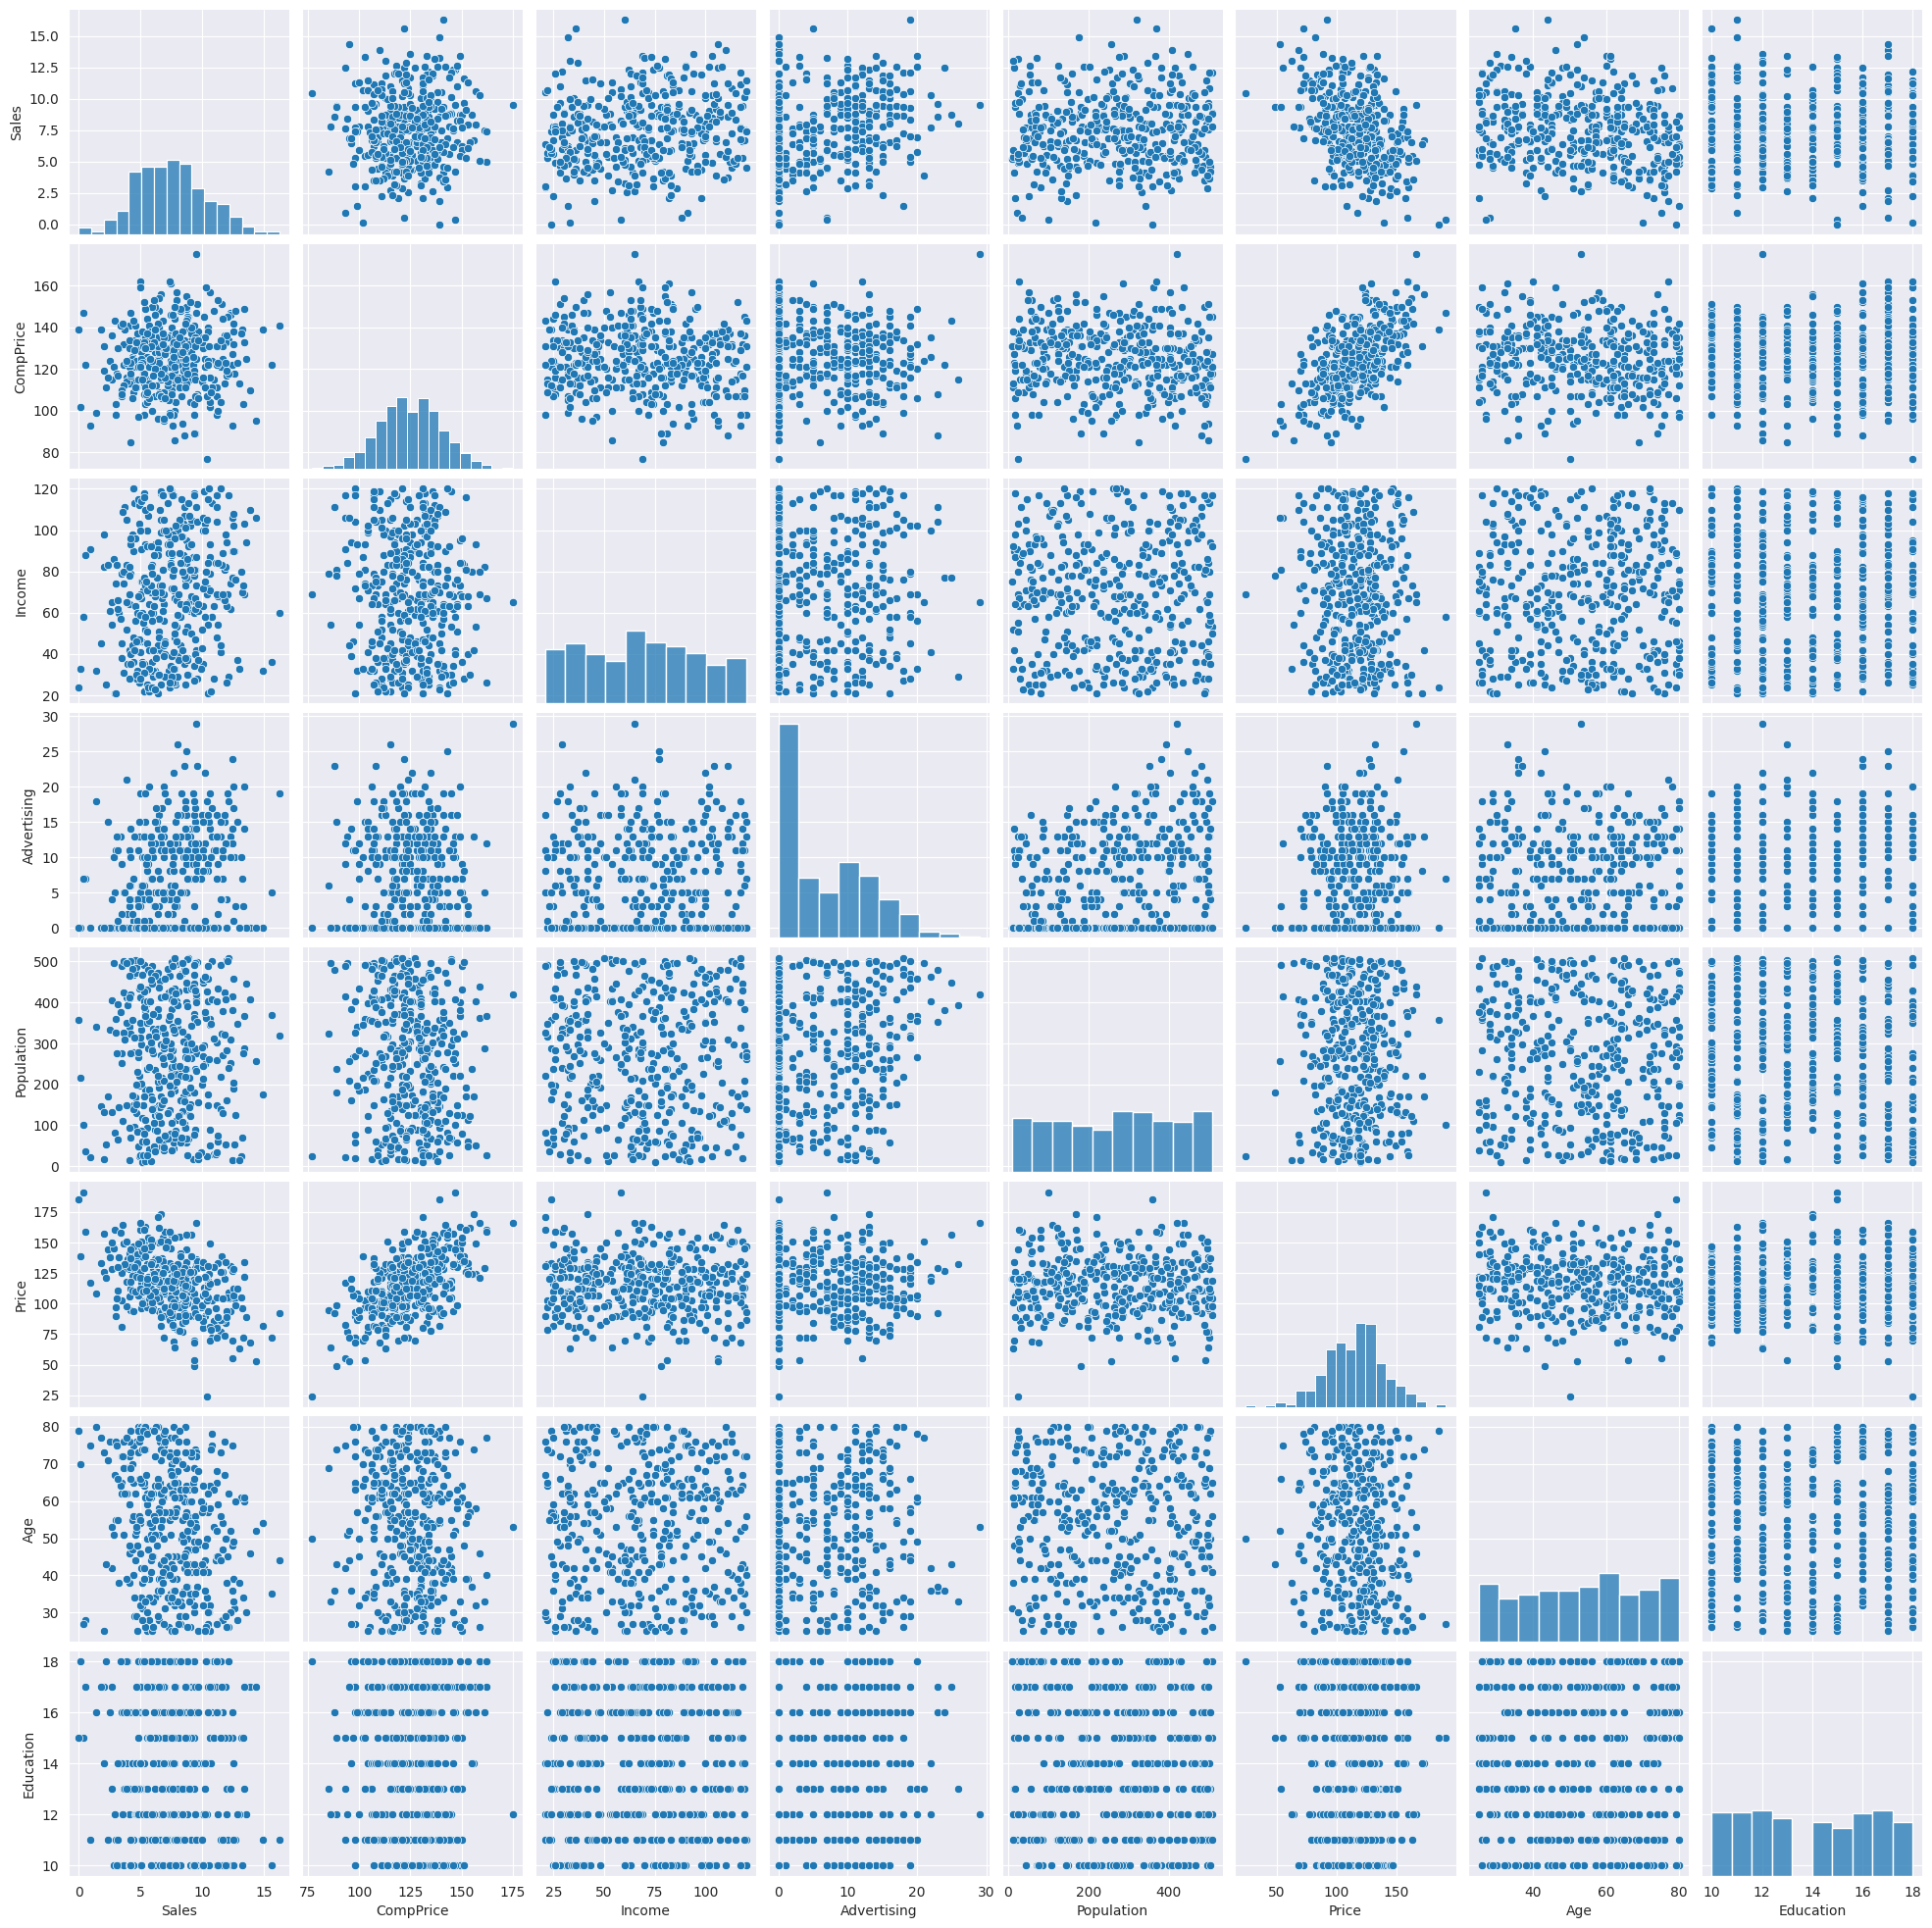

In [58]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='darkgrid')
sns.pairplot(df)

In [59]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [60]:
# Removing outliers

from pandas.core.frame import DataFrame
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

# List of columns for which you want to remove outliers
columns_to_remove_outliers = ['Sales']#,	'CompPrice',	'Income',	'Population',	'Price',	'Age','Urban']

# Apply the outlier removal method to each column
for column in columns_to_remove_outliers:
    df = remove_outliers(df, column)


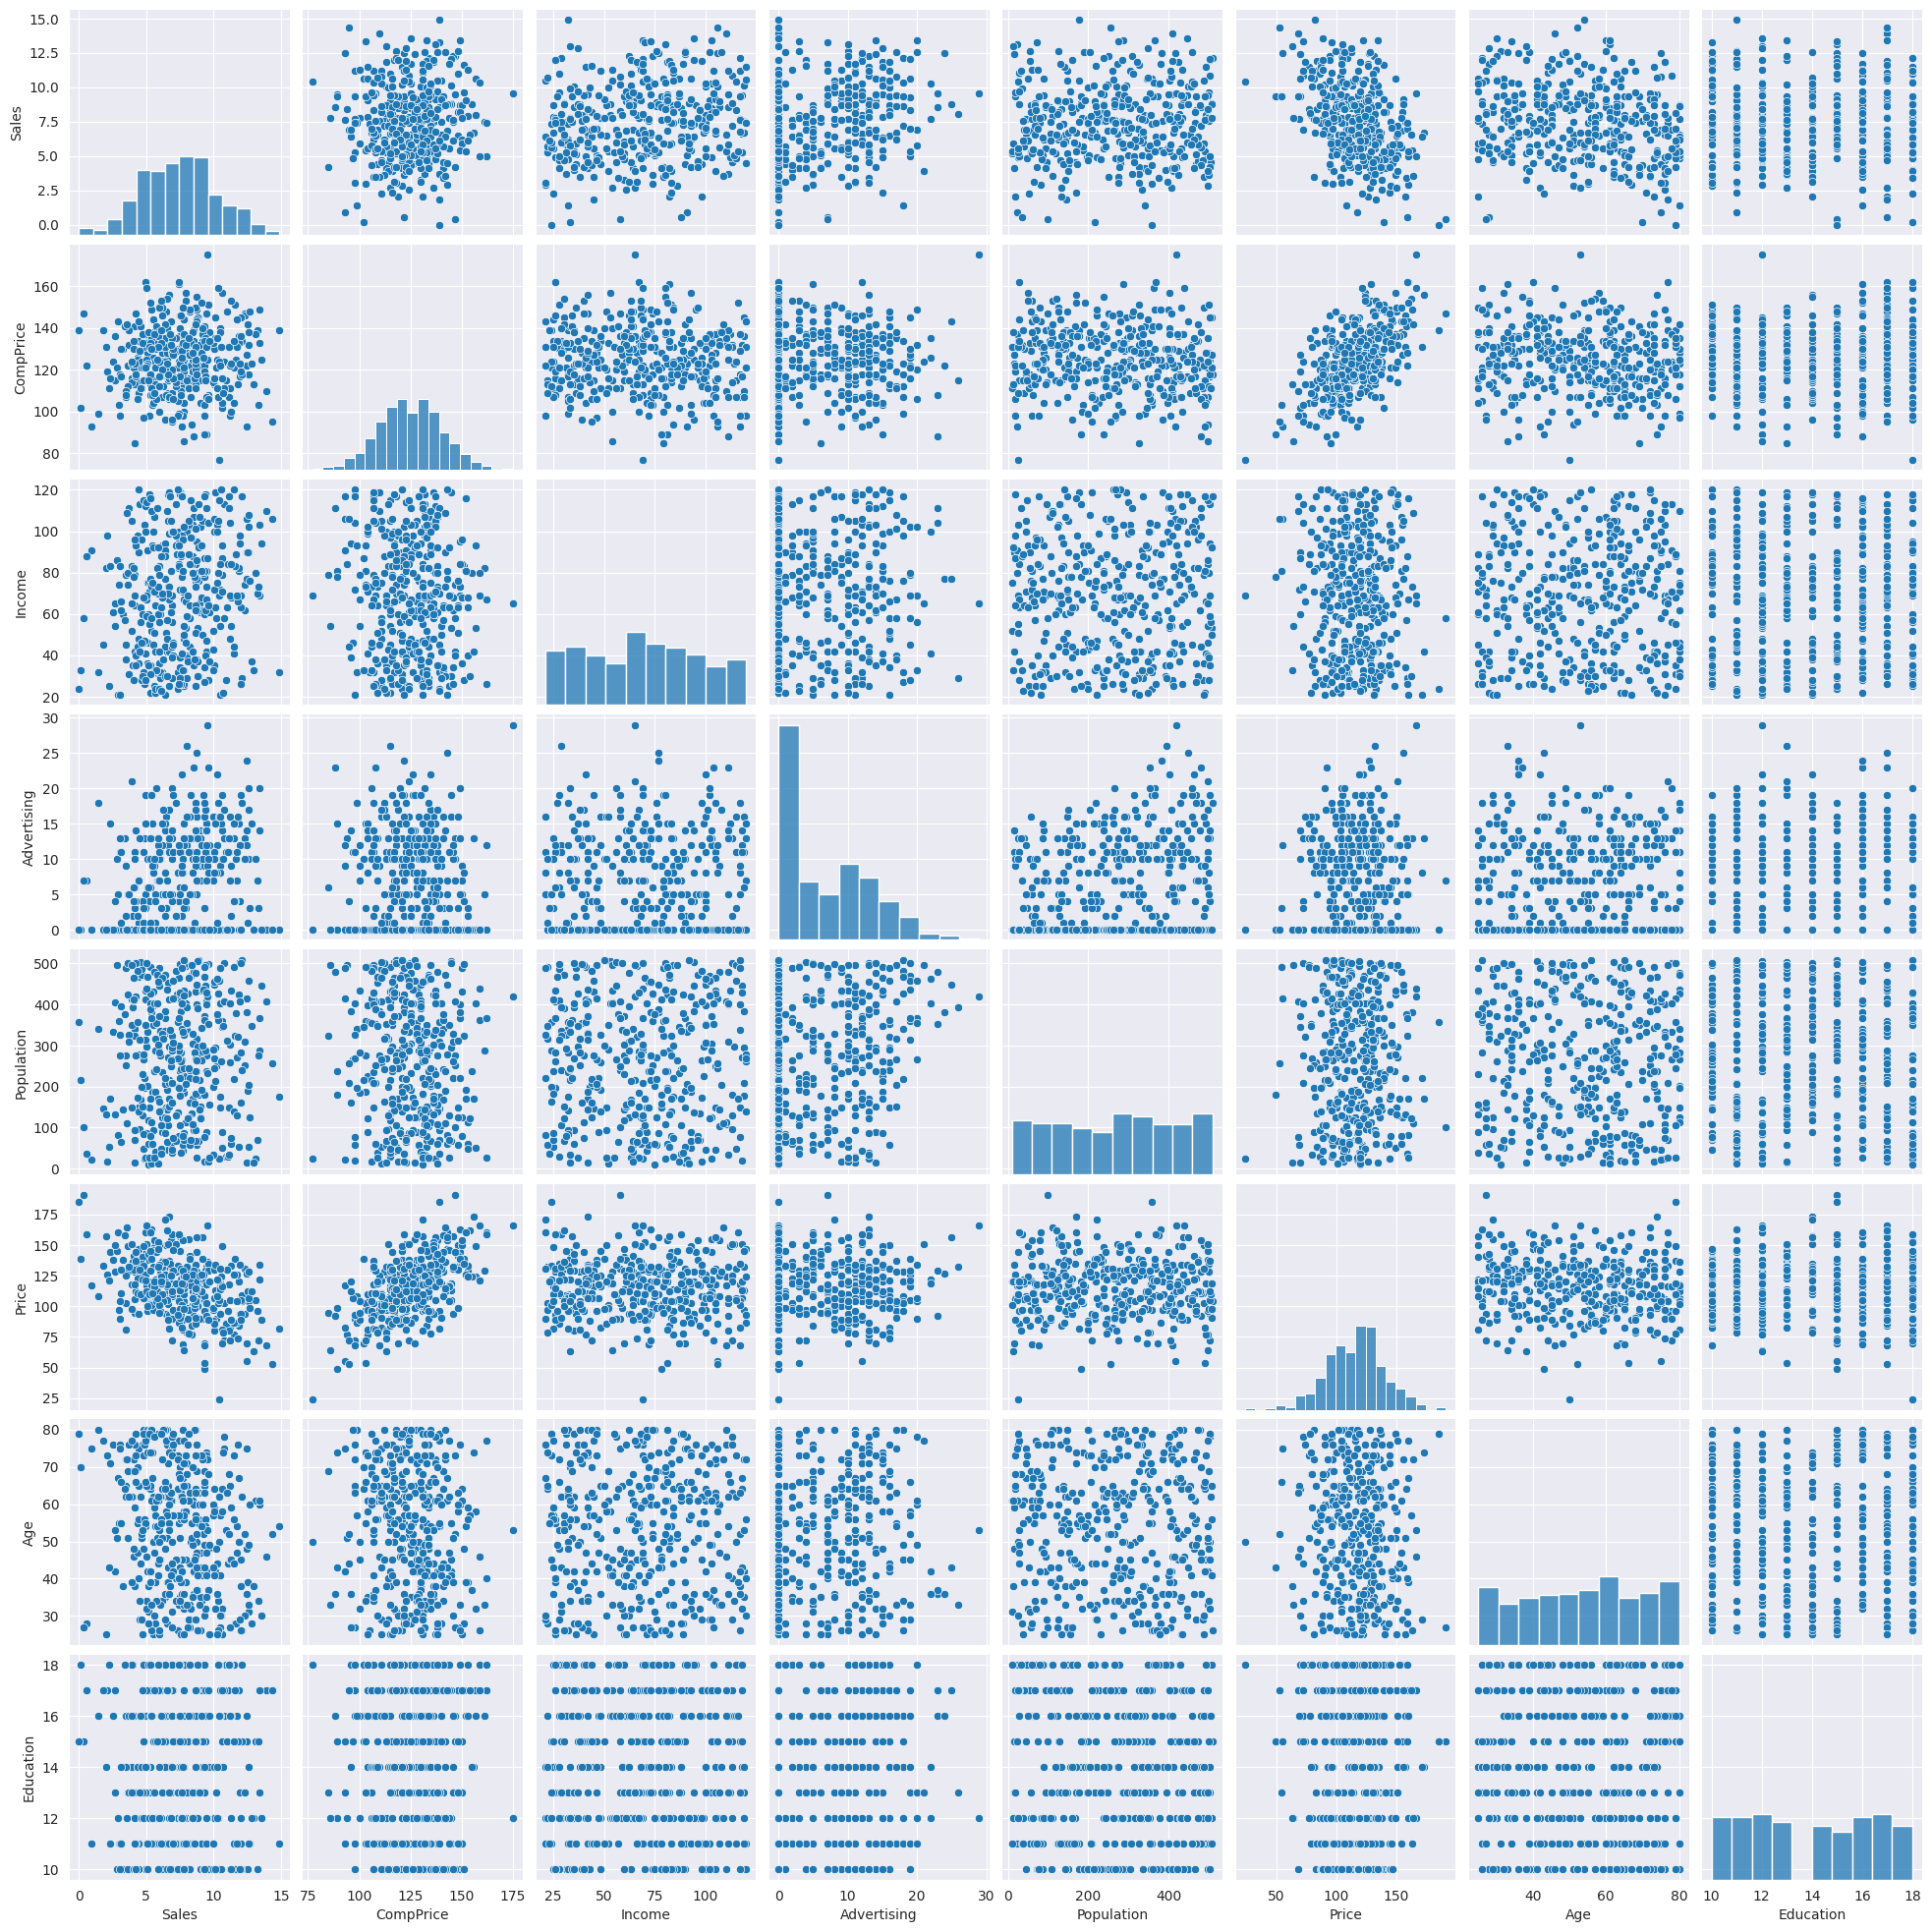

In [61]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,164.374372,36.022613,46.761307,6.603015,137.746231,50.090452,1.309045,28.391960,3.917085,0.703518,0.643216
std,93.917848,14.898210,27.272222,6.621330,78.856650,21.783960,0.835285,16.208097,2.615717,0.457281,0.479653
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,84.250000,26.000000,22.250000,0.000000,71.000000,34.250000,1.000000,15.000000,2.000000,0.000000,0.000000
50%,162.500000,36.000000,47.000000,5.000000,139.500000,51.500000,2.000000,30.000000,4.000000,1.000000,1.000000
75%,242.750000,46.000000,68.000000,12.000000,208.750000,65.000000,2.000000,41.000000,6.000000,1.000000,1.000000
max,333.000000,72.000000,97.000000,27.000000,272.000000,100.000000,2.000000,55.000000,8.000000,1.000000,1.000000


<Figure size 800x1000 with 0 Axes>

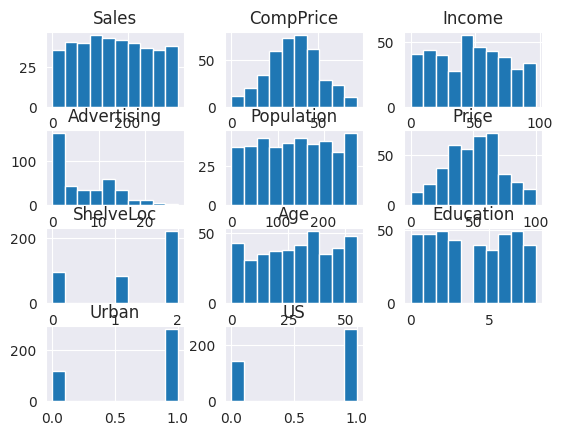

In [75]:
plt.figure(figsize=(8,10))
df.hist()
df.skew()
df.kurt()
df.describe()

In [76]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,49,51,11,141,54,0,17,7,1,1
1,297,22,27,16,129,18,1,40,0,1,1
2,267,24,14,10,138,15,2,34,2,1,1
3,158,28,77,4,247,31,2,30,4,1,1
4,37,52,42,3,177,62,0,13,3,1,0


In [77]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [78]:
for i in range(0,11):
    df.iloc[:, i] = LE.fit_transform(df.iloc[:, i])

<ipython-input-78-c985810fef19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, i] = LE.fit_transform(df.iloc[:, i])
<ipython-input-78-c985810fef19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, i] = LE.fit_transform(df.iloc[:, i])
<ipython-input-78-c985810fef19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [79]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,49,51,11,141,54,0,17,7,1,1
1,297,22,27,16,129,18,1,40,0,1,1
2,267,24,14,10,138,15,2,34,2,1,1
3,158,28,77,4,247,31,2,30,4,1,1
4,37,52,42,3,177,62,0,13,3,1,0


In [80]:
# Data division X and Y
Y = df["Sales"]
X = df.iloc[:,1:11]
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49,51,11,141,54,0,17,7,1,1
1,22,27,16,129,18,1,40,0,1,1
2,24,14,10,138,15,2,34,2,1,1
3,28,77,4,247,31,2,30,4,1,1
4,52,42,3,177,62,0,13,3,1,0


In [81]:
# data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30)

In [85]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

DT.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)
training_error = np.sqrt(mean_squared_error(Y_train,Y_pred_train)).round(2)
test_error = np.sqrt(mean_squared_error(Y_test,Y_pred_test)).round(2)

print("training_error :",training_error)
print("test_error", test_error)
print("Variance: ", (test_error-training_error).round(2))

training_error : 0.0
test_error 84.58
Variance:  84.58


In [86]:
DT = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 200, max_samples = 0.6, max_features=0.7,max_depth=5)

In [87]:
training_error = []
test_error = []
Tr = []
Ts = []

In [88]:
# cross validation

for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    RF.fit(X_train,Y_train)
    Y_pred_train = RF.predict(X_train)
    Y_pred_test = RF.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)).round(3))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)).round(3))

import numpy as np
print("Average trianing error",np.mean(training_error).round(2))
print("Average test error",np.mean(test_error).round(2))
print("Variance: ", (np.mean(test_error)-np.mean(training_error)).round(2))

Average trianing error 43.93
Average test error 59.86
Variance:  15.94


In [89]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(learning_rate=0.1,
                                n_estimators=100,
                                max_features=0.7)

In [90]:
training_error = []
test_error = []
Tr = []
Ts = []

In [91]:
# cross validation with Gradient Boosting

for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    GBR.fit(X_train,Y_train)
    Y_pred_train = GBR.predict(X_train)
    Y_pred_test = GBR.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)).round(3))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)).round(3))

import numpy as np
print("Average trianing error",np.mean(training_error).round(2))
print("Average test error",np.mean(test_error).round(2))
print("Variance: ", (np.mean(test_error)-np.mean(training_error)).round(2))


Average trianing error 20.88
Average test error 48.77
Variance:  27.89


In [92]:
# AdaBoost Regressor

from sklearn.ensemble import AdaBoostRegressor
ABR = AdaBoostRegressor(learning_rate=0.1,
                                n_estimators=100)

In [93]:
training_error = []
test_error = []
Tr = []
Ts = []

In [94]:
# cross validation with Adaptive Boosting
import numpy as np
for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    ABR.fit(X_train,Y_train)
    Y_pred_train = ABR.predict(X_train)
    Y_pred_test = ABR.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)).round(3))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)).round(3))

print("Average trianing error",np.mean(training_error).round(2))
print("Average test error",np.mean(test_error).round(2))
print("Variance: ", (np.mean(test_error)-np.mean(training_error)).round(2))


Average trianing error 50.23
Average test error 60.99
Variance:  10.76


In [95]:
# Xtreme Gradient boosting Technique
from xgboost import XGBRegressor
XGB = XGBRegressor(gamma=20,reg_lambda=8,n_estimators=500,learning_rate=0.1)

In [96]:
training_error = []
test_error = []
Tr = []
Ts = []

In [97]:
# cross validation with XGBRegressor
import numpy as np
for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    XGB.fit(X_train,Y_train)
    Y_pred_train = XGB.predict(X_train)
    Y_pred_test = XGB.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)).round(3))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)).round(3))

print("Average trianing error",np.mean(training_error).round(2))
print("Average test error",np.mean(test_error).round(2))
print("Variance: ", (np.mean(test_error)-np.mean(training_error)).round(2))


Average trianing error 5.37
Average test error 53.28
Variance:  47.92
